In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
#Define a quadratic loss function
def quadratic_loss(x , y):
    return x ** 2 + 10  * y ** 2


#gradientoflossfuntion
def quadratic_grad(x, y):
    dx = 2 * x
    dy = 2 * y
    return np.array([dx , dy])


In [33]:
#batch gradient 
def batch_gradient_desc(grad_func , eta , epochs , starting_point):
    x , y = starting_point
    path = [(x , y)]
    losses = [quadratic_loss(x , y)]

    for _ in range(epochs):
        grad = grad_func(x , y)
        x -= eta * grad[0]
        y -= eta * grad[1]
        path.append((x, y))
        losses.append(quadratic_loss(x , y))

    return np.array(path) , losses



In [34]:
#Momentum Grad
def gradient_descent_momentum(grad_func, eta , epochs , beta, starting_point):
    x , y = starting_point
    v = np.array([0,0])
    path = [(x, y)]
    losses = [quadratic_loss(x , y)]

    for _ in range(epochs):
        grad = grad_func(x , y)
        v = beta * v + (1 - beta) * grad
        x -= eta * v[0]
        y -= eta * v[1]
        path.append((x , y))
        losses.append(quadratic_loss(x, y))
    
    return np.array(path) , losses


In [ ]:
#visualization path
def plot_paths(function , paths , labels , title ):
    X , Y = np.meshgrid(np.linspace(-2 , 2, 400), np.linspace(-2 , 2 , 400))
    Z = function(X , Y)

    plt.Figure(figsize= (8 , 6))
    plt.contour(X , Y , Z , levels = 50 , cmp = 'jet')

    for path, label in zip(paths , labels):
        plt.plot(path[: ,0] , path[: , 1] , label = label)
        plt.scatter(path[0 , 0] , path[0, 1] , color = 'green' ,label = 'start')
        plt.scatter(path[-1 ,0] , path[-1 , 1] , color = 'red' ,label = 'End')

    
    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.show()

In [43]:
#loss viazualization
def plot_losses(losses ,labels , title ):
    plt.figure(figsize=( 8 , 6))

    for loss, label in zip(losses , labels):
        plt.plot(loss , label = label)
    
    plt.title(title)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


In [45]:
#parameters
eta_bgd = 0.1
eta_momentum = 0.1
beta = 0.9
epochs = 50
start_point = (1.5 , 1.5)

In [46]:
path_bgd , losses_bgd = batch_gradient_desc(quadratic_grad , eta_bgd , epochs , start_point)
path_momentum, losses_momentum = gradient_descent_momentum(quadratic_grad , eta_momentum , epochs , beta , start_point)

C:\Users\AMINGO\AppData\Local\Temp\ipykernel_18448\2275959875.py:7: UserWarning: The following kwargs were not used by contour: 'cmp'
  plt.contour(X , Y , Z , levels = 50 , cmp = 'jet')


TypeError: list indices must be integers or slices, not tuple

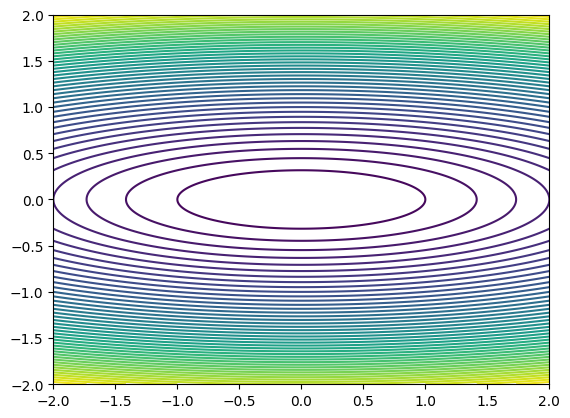

In [41]:
plot_paths(quadratic_loss , [path_bgd , path_momentum] , ['Batch Gradient Descent' , 'Gradient Descent With Momentum'] , "Oscillations in BGD vs Momentum")